0
215
start
220160 [ 5.09659108e-03  5.49333171e-03  4.79140599e-03 ...  4.88296152e-04
  2.13629566e-04 -9.15555284e-05]


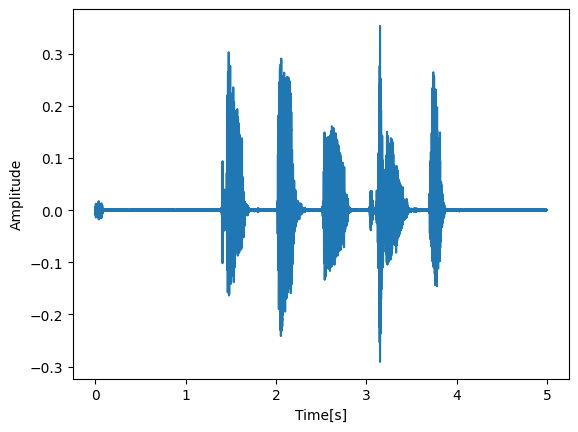

In [1]:
import pyaudio
import numpy as np
from matplotlib import pyplot as plt

def get_mic_index(pa):
    """マイクチャンネルを取得する関数"""
    
    # マイクチャンネル一覧をリストに追加する
    mic_list = []
    for i in range(pa.get_device_count()):
        device_info = pa.get_device_info_by_index(i)
        num_of_input_ch = device_info['maxInputChannels']
    
        if num_of_input_ch > 0:
            mic_list.append(device_info['index'])
    
    return mic_list[0]

def record(pa, index, duration):
    """PC のマイクで録音する関数"""

    # 録音条件
    sampling_rate = 44100
    frame_size = 1024

    # ストリームを開く
    stream = pa.open(format=pyaudio.paInt16, channels=1, rate=sampling_rate,
                     input=True, input_device_index=index, frames_per_buffer=frame_size)

    # ループ数の設定
    dt = 1 / sampling_rate
    n = int(((duration / dt) / frame_size))
    print(n)

    # 録音する
    waveform = []
    print('start')
    for i in range(n):
        frame = stream.read(frame_size)
        waveform.append(frame)

    # ストリームの終了
    stream.stop_stream()
    stream.close()

    # データをまとめる
    waveform = b"".join(waveform)

    # バイトデータを数値データに変換
    byte_to_num = np.frombuffer(waveform, dtype="int16")

    # 最大値を計算
    max_value = float((2 ** 16 / 2) - 1)

    # 波形を正規化
    normalized_waveform = byte_to_num / max_value
    
    return normalized_waveform, sampling_rate

def graph_plot(x, y):
    """ 波形をグラフにする関数"""

    # グラフの設定
    fig, ax = plt.subplots()
    ax.set_xlabel('Time[s]')
    ax.set_ylabel('Amplitude')

    # データのプロット
    ax.plot(x, y)
    plt.show()
    plt.close()

    return

# PyAudio を準備する
pa = pyaudio.PyAudio()

# マイクチャンネルを自動取得
index = get_mic_index(pa)
print(index)

# 計測条件を設定して録音関数を実行
duration = 5
waveform, sampling_rate = record(pa, index, duration)
print(len(waveform), waveform)

# PyAudio を終了
pa.terminate()

# グラフをプロットする
dt = 1 / sampling_rate
t = np.arange(0, len(waveform) * dt, dt)
graph_plot(t, waveform)